In [1]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def ode(x, y):
    return np.sin(x)*np.exp(-0.05*x)

def event0(x, y):
    return y # to find where y = 0

def event1(x, y):
    return ode(x, y) # to find where dy = 0

def event2(x, y):
    return ode(x, y) # to find where dy = 0

def event3(x, y):
    return y - 0.5 # to find y = 0.5
    
event1.direction = 1 # this finds minima
event2.direction = -1 # this finds maxima
sol = solve_ivp(ode, (-1, 20), np.array([-0.5]), max_step = 0.1, events = [event0, event1, event2, event3])

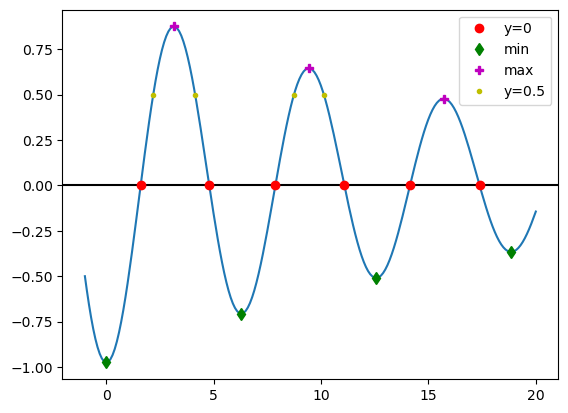

In [3]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
ax.axhline(0, color = 'k')
ax.plot(sol.t_events[0], sol.y_events[0], 'ro', label = 'y=0')
ax.plot(sol.t_events[1], sol.y_events[1], 'gd', label = 'min')
ax.plot(sol.t_events[2], sol.y_events[2], 'mP', label = 'max')
ax.plot(sol.t_events[3], sol.y_events[3], 'y.', label = 'y=0.5')
ax.legend()

In [4]:
sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 1268
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([-1.00000000e+00, -9.10748244e-01, -8.10748244e-01, -7.10748244e-01,
       -6.10748244e-01, -5.10748244e-01, -4.10748244e-01, -3.10748244e-01,
       -2.10748244e-01, -1.10748244e-01, -1.07482436e-02,  8.92517564e-02,
        1.89251756e-01,  2.89251756e-01,  3.89251756e-01,  4.89251756e-01,
        5.89251756e-01,  6.89251756e-01,  7.89251756e-01,  8.89251756e-01,
        9.89251756e-01,  1.08925176e+00,  1.18925176e+00,  1.28925176e+00,
        1.38925176e+00,  1.48925176e+00,  1.58925176e+00,  1.68925176e+00,
        1.78925176e+00,  1.88925176e+00,  1.98925176e+00,  2.08925176e+00,
        2.18925176e+00,  2.28925176e+00,  2.38925176e+00,  2.48925176e+00,
        2.58925176e+00,  2.68925176e+00,  2.78925176e+00,  2.88925176e+00,
        2.98925176e+00,  3.08925176e+00,  3.18925176e+00,  3.28925176e

In [5]:
# stop integration when reaching the first maxima
event2.terminal = True
sol = solve_ivp(ode, (-1, 20), np.array([-0.5]), max_step = 0.1, events = [event0, event1, event2, event3])

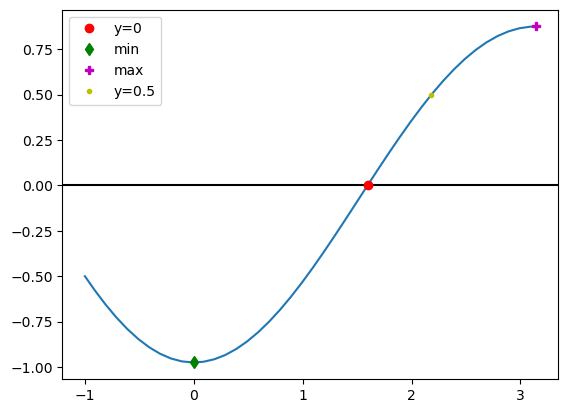

In [6]:
fig, ax = plt.subplots()

ax.plot(sol.t, sol.y.T)
ax.axhline(0, color = 'k')
ax.plot(sol.t_events[0], sol.y_events[0], 'ro', label = 'y=0')
ax.plot(sol.t_events[1], sol.y_events[1], 'gd', label = 'min')
ax.plot(sol.t_events[2], sol.y_events[2], 'mP', label = 'max')
ax.plot(sol.t_events[3], sol.y_events[3], 'y.', label = 'y=0.5')
ax.legend()